# Data-Minding Group Progress Report

# Project Introduction

This project explores **air pollution trends across the United States** in **urban vs. rural areas**, using 2023–2024 data. While urban pollution from traffic and industry is well-known, rural areas also face challenges from agriculture, natural sources, and shifting weather patterns.

We analyze pollutant data (CO, NO₂, SO₂, O₃) alongside meteorological variables (wind, temperature, pressure) to investigate:
- How pollution levels differ between urban and rural areas.
- What factors (weather, traffic, industrial activity) drive regional pollution trends.

---

#  Scope Changes

### What Stayed the Same:
- Focus on comparing air quality between urban and rural regions.
- Use of pollutant and weather data from 2023–2024.

### What Changed:
- **Expanded scope to the full U.S.** instead of just 24 states.
- Plan to add **traffic and industrial activity data** for deeper analysis.
- Will use **Census or USDA data** to classify urban vs. rural areas accurately.

### Removed:
- PM2.5 analysis (due to data gaps).
- County-level analysis postponed in favor of cleaner state-level trends (for now).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Data Cleaning

In [2]:
# Define file paths
files_2024 = {
    "CO": "daily_42101_2024.csv",
    "SO2": "daily_42401_2024.csv",
    "Ozone": "daily_44201_2024.csv",
    "NO2": "daily_42602_2024.csv",
    "Pressure": "daily_PRESS_2024.csv",
    "Humidity_DewPoint": "daily_RH_DP_2024.csv",
    "Temperature": "daily_TEMP_2024.csv",
    "Wind": "daily_WIND_2024.csv"
}

# Load each dataset into individual DataFrames
CO_2024 = pd.read_csv(files_2024["CO"])
SO2_2024 = pd.read_csv(files_2024["SO2"])
Ozone_2024 = pd.read_csv(files_2024["Ozone"])
NO2_2024 = pd.read_csv(files_2024["NO2"])
Pressure_2024 = pd.read_csv(files_2024["Pressure"])
Humidity_DewPoint_2024 = pd.read_csv(files_2024["Humidity_DewPoint"])
Temperature_2024 = pd.read_csv(files_2024["Temperature"])
Wind_2024 = pd.read_csv(files_2024["Wind"])

# # Example of checking the first few rows of each DataFrame
# print(CO_2024.head())
# print(SO2_2024.head())
# print(Ozone_2024.head())
# print(NO2_2024.head())
# print(Pressure_2024.head())
# print(Humidity_DewPoint_2024.head())
# print(Temperature_2024.head())
# print(Wind_2024.head())



<ipython-input-2-dc114684e66c>:14: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  CO_2024 = pd.read_csv(files_2024["CO"])
<ipython-input-2-dc114684e66c>:15: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  SO2_2024 = pd.read_csv(files_2024["SO2"])
<ipython-input-2-dc114684e66c>:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  Ozone_2024 = pd.read_csv(files_2024["Ozone"])


In [3]:
# Define file paths
files_2023 = {
    "CO": "daily_42101_2023.csv",
    "SO2": "daily_42401_2023.csv",
    "Ozone": "daily_44201_2023.csv",
    "NO2": "daily_42602_2023.csv",
    "Pressure": "daily_PRESS_2023.csv",
    "Humidity_DewPoint": "daily_RH_DP_2023.csv",
    "Temperature": "daily_TEMP_2023.csv",
    "Wind": "daily_WIND_2023.csv"
}

# Load each dataset into individual DataFrames
CO_2023 = pd.read_csv(files_2023["CO"])
SO2_2023 = pd.read_csv(files_2023["SO2"])
Ozone_2023 = pd.read_csv(files_2023["Ozone"])
NO2_2023 = pd.read_csv(files_2023["NO2"])
Pressure_2023 = pd.read_csv(files_2023["Pressure"])
Humidity_DewPoint_2023 = pd.read_csv(files_2023["Humidity_DewPoint"])
Temperature_2023 = pd.read_csv(files_2023["Temperature"])
Wind_2023 = pd.read_csv(files_2023["Wind"])

# # Example of checking the first few rows of each DataFrame
# print(CO_2023.head())
# print(SO2_2023.head())
# print(Ozone_2023.head())
# print(NO2_2023.head())
# print(Pressure_2023.head())
# print(Humidity_DewPoint_2023.head())
# print(Temperature_2023.head())
# print(Wind_2023.head())



<ipython-input-3-526aa08623f8>:14: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  CO_2023 = pd.read_csv(files_2023["CO"])
<ipython-input-3-526aa08623f8>:15: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  SO2_2023 = pd.read_csv(files_2023["SO2"])
<ipython-input-3-526aa08623f8>:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  Ozone_2023 = pd.read_csv(files_2023["Ozone"])
<ipython-input-3-526aa08623f8>:17: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  NO2_2023 = pd.read_csv(files_2023["NO2"])


## Common Characteristics
### Feature	Value
* Granularity: Daily-level per location (CBSA/County/Site)
* Temporality:	All datasets cover January–December 2023-2024. Some sites may have missing days or gaps, handled via imputation or aggregation.
* Scope:
  * Datasets span all of 2023 and 2024.
  * Covers multiple pollutants (CO, SO2, Ozone, NO2) and weather variables (Temperature, Wind, etc.).
  * Geographic scope is national (USA)
* Faithfulness:	Most datasets are complete (minimal to no missing values)


In [5]:
def clean_pollutant_dataset(df, pollutant_standard=None):
    # Optional filter for pollutant standard (e.g., CO 8-hour 1971)
    if pollutant_standard and 'Pollutant Standard' in df.columns:
        df = df[df['Pollutant Standard'] == pollutant_standard]

    # Convert 'Date Local' to datetime and drop rows with invalid dates
    if 'Date Local' in df.columns:
        df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')
        df = df.dropna(subset=['Date Local'])

    # Drop duplicate rows
    df = df.drop_duplicates()

    return df

def combine_datasets_POLLUTANTS(file1, file2, file3, file4, output_file):
    # Load and clean each dataset
    df1 = clean_pollutant_dataset(pd.read_csv(file1))  # Ozone
    df2 = clean_pollutant_dataset(pd.read_csv(file2), pollutant_standard='SO2 1-hour 2010')
    df3 = clean_pollutant_dataset(pd.read_csv(file3), pollutant_standard='CO 8-hour 1971')
    df4 = clean_pollutant_dataset(pd.read_csv(file4))  # NO2

    # Select relevant columns and rename for clarity
    df1 = df1[['State Name', 'County Name', 'Date Local', 'Local Site Name',
               'Arithmetic Mean', '1st Max Value', '1st Max Hour']].rename(
        columns={
            'Arithmetic Mean': 'Arithmetic Mean_ozone',
            '1st Max Value': '1st Max Value_ozone',
            '1st Max Hour': '1st Max Hour_ozone'
        })

    df2 = df2[['State Name', 'County Name', 'Date Local', 'Local Site Name',
               'Arithmetic Mean', '1st Max Value', '1st Max Hour']].rename(
        columns={
            'Arithmetic Mean': 'Arithmetic Mean_so2',
            '1st Max Value': '1st Max Value_so2',
            '1st Max Hour': '1st Max Hour_so2'
        })

    df3 = df3[['State Name', 'County Name', 'Date Local', 'Local Site Name',
               'Arithmetic Mean', '1st Max Value', '1st Max Hour']].rename(
        columns={
            'Arithmetic Mean': 'Arithmetic Mean_co',
            '1st Max Value': '1st Max Value_co',
            '1st Max Hour': '1st Max Hour_co'
        })

    df4 = df4[['State Name', 'County Name', 'Date Local', 'Local Site Name',
               'Arithmetic Mean', '1st Max Value', '1st Max Hour']].rename(
        columns={
            'Arithmetic Mean': 'Arithmetic Mean_no2',
            '1st Max Value': '1st Max Value_no2',
            '1st Max Hour': '1st Max Hour_no2'
        })

    # Merge datasets on common keys
    merged_df = pd.merge(df1, df2, on=['State Name', 'County Name', 'Date Local', 'Local Site Name'], how='inner')
    merged_df = pd.merge(merged_df, df3, on=['State Name', 'County Name', 'Date Local', 'Local Site Name'], how='inner')
    merged_df = pd.merge(merged_df, df4, on=['State Name', 'County Name', 'Date Local', 'Local Site Name'], how='inner')

    # Sort by location and date
    merged_df = merged_df.sort_values(by=['State Name', 'County Name', 'Date Local'])

    # Save to CSV
    merged_df.to_csv(output_file, index=False)
    print(f"Merged pollutant dataset saved to: {output_file}")


In [6]:
combine_datasets_POLLUTANTS(
    "daily_44201_2023.csv",  # Ozone
    "daily_42401_2023.csv",  # SO2
    "daily_42101_2023.csv",  # CO
    "daily_42602_2023.csv",  # NO2
    "merged_ALL_POLLUTANTS_2023.csv"
)

<ipython-input-5-a8cffab4def2>:18: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = clean_pollutant_dataset(pd.read_csv(file1))  # Ozone
<ipython-input-5-a8cffab4def2>:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = clean_pollutant_dataset(pd.read_csv(file2), pollutant_standard='SO2 1-hour 2010')
<ipython-input-5-a8cffab4def2>:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = clean_pollutant_dataset(pd.read_csv(file3), pollutant_standard='CO 8-hour 1971')
<ipython-input-5-a8cffab4def2>:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = clean_pollutant_dataset(pd.read_csv(file4))  # NO2


Merged pollutant dataset saved to: merged_ALL_POLLUTANTS_2023.csv


In [7]:
combine_datasets_POLLUTANTS(
    "daily_44201_2024.csv",  # Ozone
    "daily_42401_2024.csv",  # SO2
    "daily_42101_2024.csv",  # CO
    "daily_42602_2024.csv",  # NO2
    "merged_ALL_POLLUTANTS_2024.csv"
)

<ipython-input-5-a8cffab4def2>:18: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = clean_pollutant_dataset(pd.read_csv(file1))  # Ozone
<ipython-input-5-a8cffab4def2>:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = clean_pollutant_dataset(pd.read_csv(file2), pollutant_standard='SO2 1-hour 2010')
<ipython-input-5-a8cffab4def2>:20: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = clean_pollutant_dataset(pd.read_csv(file3), pollutant_standard='CO 8-hour 1971')


Merged pollutant dataset saved to: merged_ALL_POLLUTANTS_2024.csv


In [8]:
def combine_datasets_METEO(file1, file2, file3, file4, output_file):
    # Read all four datasets
    df1 = pd.read_csv(file1)  #
    df2 = pd.read_csv(file2)  # SO2
    df3 = pd.read_csv(file3)  # CO
    df4 = pd.read_csv(file4)  # NO2
    df5 = df4.copy()

    # filtered_df = df[df['Ozone'] > 0.03]
    df4 = df4[df4['Parameter Name'] == 'Wind Speed - Resultant']
    df5 = df5[df5['Parameter Name'] == 'Wind Direction - Resultant']

    # Select the relevant columns and rename them for each dataset
    df1 = df1[['State Name', 'County Name', 'Date Local', 'Local Site Name', 'Arithmetic Mean', '1st Max Value', '1st Max Hour']].rename(
        columns={'Arithmetic Mean': 'Arithmetic Mean_PRESS', '1st Max Value': '1st Max Value_PRESS', '1st Max Hour': '1st Max Hour_PRESS'})
    df2 = df2[['State Name', 'County Name', 'Date Local', 'Local Site Name', 'Arithmetic Mean', '1st Max Value', '1st Max Hour']].rename(
        columns={'Arithmetic Mean': 'Arithmetic Mean_RH_DP', '1st Max Value': '1st Max Value_RH_DP', '1st Max Hour': '1st Max Hour_RH_DP'})
    df3 = df3[['State Name', 'County Name', 'Date Local', 'Local Site Name', 'Arithmetic Mean', '1st Max Value', '1st Max Hour']].rename(
        columns={'Arithmetic Mean': 'Arithmetic Mean_TEMP', '1st Max Value': '1st Max Value_TEMP', '1st Max Hour': '1st Max Hour_TEMP'})
    df4 = df4[['State Name', 'County Name', 'Date Local', 'Local Site Name', 'Arithmetic Mean', '1st Max Value', '1st Max Hour']].rename(
        columns={'Arithmetic Mean': 'Arithmetic Mean_WIND_SPEED', '1st Max Value': '1st Max Value_WIND_SPEED', '1st Max Hour': '1st Max Hour_WIND_SPEED'})
    df5 = df5[['State Name', 'County Name', 'Date Local', 'Local Site Name', 'Arithmetic Mean', '1st Max Value', '1st Max Hour']].rename(
        columns={'Arithmetic Mean': 'Arithmetic Mean_WIND_DIRECTION', '1st Max Value': '1st Max Value_WIND_DIRECTION', '1st Max Hour': '1st Max Hour_WIND_DIRECTION'})

    # Merge the datasets on common columns ('State Code', 'County Code', 'Date Local', 'Local Site Name')
    merged_df = pd.merge(df1, df2, on=['State Name', 'County Name', 'Date Local', 'Local Site Name'], how='inner')
    merged_df = pd.merge(merged_df, df3, on=['State Name', 'County Name', 'Date Local', 'Local Site Name'], how='inner')
    merged_df = pd.merge(merged_df, df4, on=['State Name', 'County Name', 'Date Local', 'Local Site Name'], how='inner')
    merged_df = pd.merge(merged_df, df5, on=['State Name', 'County Name', 'Date Local', 'Local Site Name'], how='inner')

    merged_df = merged_df.sort_values(by=['State Name', 'County Name', 'Date Local'], ascending=[True, True, True])

    # Save the combined dataset to a CSV file
    merged_df.to_csv(output_file, index=False)
    print(f"Merged dataset saved to {output_file}")

In [9]:
combine_datasets_METEO("daily_PRESS_2023.csv", "daily_RH_DP_2023.csv", "daily_TEMP_2023.csv", "daily_WIND_2023.csv", "merged_ALL_METEO_2023.csv")

Merged dataset saved to merged_ALL_METEO_2023.csv


In [10]:
combine_datasets_METEO("daily_PRESS_2024.csv", "daily_RH_DP_2024.csv", "daily_TEMP_2024.csv", "daily_WIND_2024.csv", "merged_ALL_METEO_2024.csv")

Merged dataset saved to merged_ALL_METEO_2024.csv


## Data Cleaning Steps

- Filtered pollutant standards (e.g., **CO 8-hour 1971**, **SO2 1-hour 2010**) and wind parameters (**Wind Speed - Resultant**, **Wind Direction - Resultant**) for consistency.  
- Selected key features: **Arithmetic Mean**, **Max Value**, and **Max Hour** across all datasets.  
- Renamed columns to reflect their source and ensure uniqueness after merging.  
- Dropped unnecessary columns like **Local Site Name** in final merges.  
- Handled missing values implicitly by performing **inner joins**—retaining only rows with complete data across all selected variables.


In [11]:
def combine_datasets(file1, file2, file3, output_file):
    # Read all three datasets: pollutants, meteorology, aqi_by_county
    df1 = pd.read_csv(file1)  # pollutants
    df2 = pd.read_csv(file2)  # meteorology
    df3 = pd.read_csv(file3)  # aqi

    df1 = df1.drop('Local Site Name', axis=1)
    df2 = df2.drop('Local Site Name', axis=1)
    df3 = df3[['State Name', 'county Name', 'Date', 'AQI', 'Category']].rename(columns={'county Name': 'County Name'})

    # Merge the datasets on common columns ('State Code', 'County Code', 'Date Local', 'Local Site Name')
    merged_df = pd.merge(df1, df2, on=['State Name', 'County Name', 'Date Local'], how='inner')
    merged_df = merged_df.rename(columns={'Date Local': 'Date'})
    merged_df = pd.merge(merged_df, df3, on=['State Name', 'County Name', 'Date'], how='inner')
    # merged_df = pd.merge(merged_df, df4, on=['State Name', 'County Name', 'Date Local', 'Local Site Name'], how='inner')

    merged_df = merged_df.sort_values(by=['State Name', 'County Name', 'Date'], ascending=[True, True, True])

    # Save the combined dataset to a CSV file
    merged_df.to_csv(output_file, index=False)
    print(f"Merged dataset saved to {output_file}")

In [12]:
combine_datasets("merged_ALL_METEO_2023.csv", "merged_ALL_POLLUTANTS_2023.csv", "daily_aqi_by_county_2023.csv", "all_attributes_2023.csv")

Merged dataset saved to all_attributes_2023.csv


In [13]:
combine_datasets("merged_ALL_METEO_2024.csv", "merged_ALL_POLLUTANTS_2024.csv", "daily_aqi_by_county_2024.csv", "all_attributes_2024.csv")

Merged dataset saved to all_attributes_2024.csv


In [16]:
df = pd.read_csv('all_attributes_2023.csv')

unique_states = df['State Name'].unique()

df1 = pd.read_csv('all_attributes_2024.csv')

unique_states1 = df1['State Name'].unique()

print(f"Number of unique states: {unique_states}")

print(f"Number of unique states: {unique_states1}")

count = 0
commonState = []
for item in unique_states1:
    for i in unique_states:
        if (item == i):
            count += 1
            commonState.append(item)
            break

print(count)
print(len(commonState))
print(commonState)

Number of unique states: ['Alabama' 'Arizona' 'California' 'Connecticut' 'District Of Columbia'
 'Georgia' 'Idaho' 'Illinois' 'Indiana' 'Kentucky' 'Louisiana' 'Maryland'
 'Massachusetts' 'Michigan' 'Missouri' 'Nevada' 'New Hampshire'
 'New Mexico' 'North Carolina' 'North Dakota' 'Ohio' 'Pennsylvania'
 'Rhode Island' 'Tennessee' 'Texas' 'Virginia' 'Washington' 'Wyoming']
Number of unique states: ['Arizona' 'California' 'Connecticut' 'Georgia' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Louisiana' 'Maryland' 'Massachusetts' 'Michigan'
 'Missouri' 'Nevada' 'New Hampshire' 'New Mexico' 'North Carolina'
 'North Dakota' 'Ohio' 'Oregon' 'Pennsylvania' 'Rhode Island' 'Texas'
 'Virginia' 'Washington' 'Wyoming']
24
24
['Arizona', 'California', 'Connecticut', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Louisiana', 'Maryland', 'Massachusetts', 'Michigan', 'Missouri', 'Nevada', 'New Hampshire', 'New Mexico', 'North Carolina', 'North Dakota', 'Ohio', 'Pennsylvania', 'Rhode Island', 'Texas', 'Virginia', 'W

In [19]:
def filterRows(filename):
    commonState = ['Arizona', 'California', 'Connecticut', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Louisiana', 'Maryland', 'Massachusetts', 'Michigan', 'Missouri', 'Nevada', 'New Hampshire', 'New Mexico', 'North Carolina', 'North Dakota', 'Ohio', 'Pennsylvania', 'Rhode Island', 'Texas', 'Virginia', 'Washington', 'Wyoming']

    match = re.search(r'_(\d{4})', filename)
    year = match.group(1)

    df = pd.read_csv(filename)

    # Filter rows where 'State Name' is in the commonState list
    filtered_df = df[df['State Name'].isin(commonState)]

    # Optional: Save to a new CSV file
    output_filename = f'24StateAQI_{year}.csv'
    filtered_df.to_csv(output_filename, index=False)

    # Display the first few rows to verify
    print(filtered_df.head())

In [20]:
filterRows("all_attributes_2023.csv")
filterRows("all_attributes_2024.csv")

    State Name County Name        Date  Arithmetic Mean_PRESS  \
533    Arizona    Maricopa  2023-01-01             967.183333   
534    Arizona    Maricopa  2023-01-01             967.183333   
535    Arizona    Maricopa  2023-01-02             973.091667   
536    Arizona    Maricopa  2023-01-02             973.091667   
537    Arizona    Maricopa  2023-01-03             978.025000   

     1st Max Value_PRESS  1st Max Hour_PRESS  Arithmetic Mean_RH_DP  \
533                970.3                   0              82.083333   
534                970.3                   0              82.083333   
535                976.5                  21              71.916667   
536                976.5                  21              71.916667   
537                981.0                  22              68.458333   

     1st Max Value_RH_DP  1st Max Hour_RH_DP  Arithmetic Mean_TEMP  ...  \
533                 90.0                  16             54.041667  ...   
534                 90.0        

# ML Analysis
Here we are using a multi-feature linear regression model to predict 2024 AQI using the 2023 figures. To evaluate performance, we will run a baseline where our 2023 AQI is our 2024 AQI. The analysis will be done by state.
- The below part for ML analysis is from ml.ipynb and random_forest_analysis.py

In [21]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
df_2023 = pd.read_csv("/content/24StateAQI_2023.csv")
df_2024 = pd.read_csv("/content/24StateAQI_2024.csv")

In [23]:
df_2023_bystate = df_2023.groupby("State Name", as_index=False)["AQI"].mean().rename(columns={"AQI": "AQI_2023"})
df_2024_bystate = df_2024.groupby("State Name", as_index=False)["AQI"].mean().rename(columns={"AQI": "AQI_2024"})
# aggregate by state name, get average aqi per state, we also rename some columns to avoid duplicate column names.

In [24]:
df = pd.merge(df_2023_bystate, df_2024_bystate, on="State Name")

X = df[['AQI_2023']].values
y = df['AQI_2024'].values

In [25]:
y_baseline = df['AQI_2023'].values
baseline_mse = mean_squared_error(y, y_baseline)
baseline_r2 = r2_score(y, y_baseline)
print("Baseline:")
print("Mean Squared Error:", baseline_mse)
print("R2 Score:", baseline_r2)
print(f"RMSE: {math.sqrt(baseline_mse)} AQI units")

Baseline:
Mean Squared Error: 66.29198501264854
R2 Score: 0.18764956246245157
RMSE: 8.141989008384163 AQI units


In [28]:
model = LinearRegression()
model.fit(X,y)
pred = model.predict(X)
#simple linear regression

In [29]:
lr_mse = mean_squared_error(y, pred)
lr_r2 = r2_score(y, pred)

print("Linear Regression Model:")
print("Mean Squared Error:", lr_mse)
print("R2 Score:", lr_r2)
print(f"RMSE: {math.sqrt(lr_mse)} AQI units")

Linear Regression Model:
Mean Squared Error: 30.24885623589958
R2 Score: 0.629326658516034
RMSE: 5.499896020462531 AQI units


### Although this is just a starting point, we can see that we can more accurately predict AQI through machinelearning as opposed to relying solely on historical data. Going forward, we will implement a more complex model that predicts AQI using all of the features from the dataset and can draw more complex conclusions about AQI and the factors that go into it.

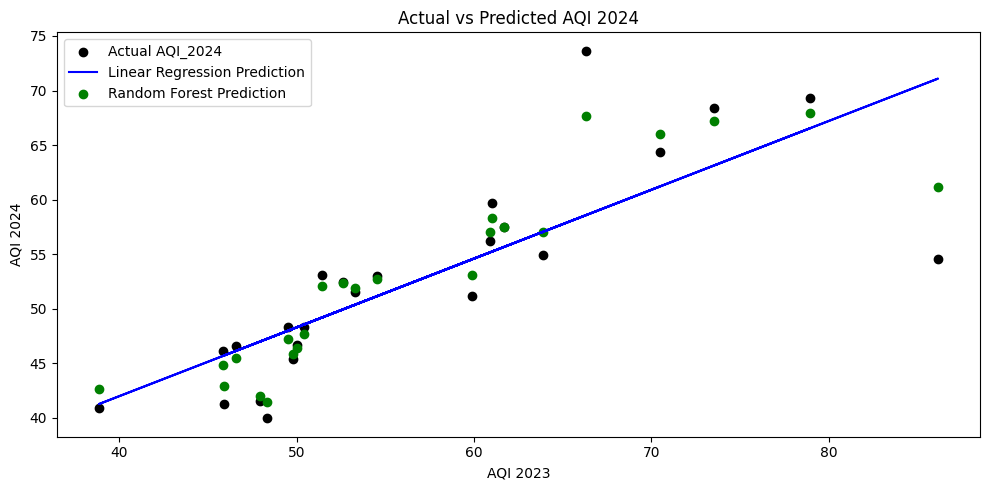

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import math

# Define features and target
X = df[['AQI_2023']]
y = df['AQI_2024']

# Train Linear Regression
baseline = LinearRegression()
baseline.fit(X, y)
y_pred_base = baseline.predict(X)

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
y_pred_rf = rf.predict(X)

# Evaluate both models
results = {
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mean_absolute_error(y, y_pred_base), mean_absolute_error(y, y_pred_rf)],
    "R2 Score": [r2_score(y, y_pred_base), r2_score(y, y_pred_rf)],
    "RMSE": [math.sqrt(mean_squared_error(y, y_pred_base)), math.sqrt(mean_squared_error(y, y_pred_rf))]
}
results_df = pd.DataFrame(results)

# Plot actual vs predicted for both models
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label='Actual AQI_2024')
plt.plot(X, y_pred_base, color='blue', label='Linear Regression Prediction')
plt.scatter(X, y_pred_rf, color='green', label='Random Forest Prediction')
plt.xlabel("AQI 2023")
plt.ylabel("AQI 2024")
plt.title("Actual vs Predicted AQI 2024")
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
results_df

,Model,MAE,R2 Score,RMSE
0,Linear Regression,3.676587,0.629327,5.499896
1,Random Forest,1.478333,0.943010,2.156537


### Both models outperform the baseline, with Random Forest achieving the lowest RMSE (2.16 vs. 8.14) and highest R² (0.94 vs. 0.19), indicating much better predictive power. Linear Regression improves over baseline but is less accurate than Random Forest.

# Exploratory data analysis

In [35]:
df = pd.read_csv('24StateAQI_2023.csv')
key_columns = ['AQI', 'Arithmetic Mean_TEMP', 'Arithmetic Mean_RH_DP']
df_key = df[key_columns]

# summary stats
mean = df_key.mean().round(2)
median = df_key.median().round(2)
mode = df[['AQI', 'Category', 'County Name', 'State Name']].mode().iloc[0]

print("Analysis of 2023 dataset")
print("Mean:")
for col in key_columns:
    print(f"{col.split('_')[-1]}: {mean[col]}")

print("Median:")
for col in key_columns:
    print(f"{col.split('_')[-1]}: {median[col]}")

print("Mode:")
print(f"AQI: {mode['AQI']} | Category: {mode['Category']} | County: {mode['County Name']} | State: {mode['State Name']}")

Analysis of 2023 dataset
Mean:
AQI: 69.77
TEMP: 63.4
DP: 60.25
Median:
AQI: 59.0
TEMP: 63.62
DP: 63.33
Mode:
AQI: 52 | Category: Moderate | County: Los Angeles | State: California


Findings: AQI mean 69.77 (Moderate condition), median 59 and mode 52, shows the occasional pollutions, where temperature and pollutants show moderate variation. Overall, the data is reliable for further analysis.

Hypothesis: Higher temperatures and lower humidity levels are strongly associated with increased AQI.

Visulization description: The heatmap shows AQI is positively correlated with temperature (r = 0.41) and negatively correlated with humidity (r = -0.14), confirming that hot, dry conditions worsen air quality.

EDA: Loaded clean data, summarized key stats, analyzed correlations and outliers, explored temporal trends, and identified high-risk hot, dry regions. This is one factor that we can consider for our hypothesis, where it could be the case of counties that are hot and dry is higher risk of being polluted.

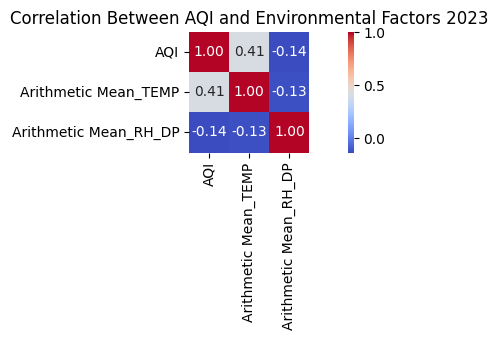

In [36]:
df = pd.read_csv('24StateAQI_2023.csv')
df['Date'] = pd.to_datetime(df['Date'])

corr_columns = [
    'AQI',
    'Arithmetic Mean_TEMP',
    'Arithmetic Mean_RH_DP',
]
corr_data = df[corr_columns].dropna()
corr_matrix = corr_data.corr()

plt.figure(figsize=(8,3.5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Between AQI and Environmental Factors 2023')
plt.tight_layout()
plt.show()

Higher temperatures and lower humidity levels are strongly associated with increased AQI. This could be an interesting aspect to consider along with the hypothesis because this shows that places that are hot and dry have higher risks of being polluted.

# Reflection
- Hardest part: Handling large, detailed datasets without slowdowns.

- Insights: AQI is strongly predictable from past values; Random Forest outperforms other models.

- Concrete results: Yes — Random Forest achieved R² = 0.94 and RMSE = 2.16 vs. baseline RMSE = 8.14.

- Biggest problems now: having data to rural vs urband

- On track? Yes, but more time is needed for deeper data integration and model refinement.

- Worth continuing? Absolutely — results are promising and support the project’s goals.

# Next Steps
- Consider updating data to cover both urban and rural areas
- Build classification models to predict AQI categories (e.g., Good, Moderate, Unhealthy).

- Visualize trends across time and geography to uncover spatial-temporal patterns.

- Evaluate model performance using cross-validation and external validation.

- Document results for interpretability and reproducibility.